<img src='https://cdn.discordapp.com/attachments/821798935986962484/824402260377206804/Wills_GIF_Ver.2_Speedup.gif' />

Help your team set up two tents at the top of the mountain as fast as possible. Each day, offer multiple suggestions to your teammates until you tell them to rest, or they refuse to listen to you. 

Careful, there have been yeti sightings, and your team members spook easily. Try not to lose too much progress by pushing too hard. Set up tents to lock in your position permanently.

Try and do it in as few days as possible.

Rules left ambigious on purpose (learn by exploring, like the AI does!). Hint: Bad things tend to happen more often when two teams are already out and climbing.

To Run, Press Ctrl+f10 / Run the Cell Below, then scroll down until you see a board. You may be prompted to log in with your google account or accept a warning message that may pop up.

↓ Or Click the play button when you hover there (Look for a spinng black circle) and then scroll down until you see a board



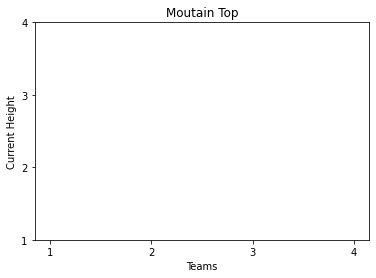

Red Dot are tents, black dots are team members climbing
Get two red dots at the top of the mountain as fast as possible 

Day 1, The following teams are motivated at this moment
Team 2 and Team 1
Pick an action, [a,b,c,d]
a is Suggest team 2 go up and set up for the night
b is Suggest team 2 go up and prepare for another round
c is Suggest team 1 go up and set up for the night
d is Suggest team 1 go up and prepare for another round


KeyboardInterrupt: ignored

In [ ]:
from IPython.display import display
from IPython.display import clear_output
import matplotlib.pyplot as plt

import numpy as np
import random

#Return Dice Value Sorted Small to big, when 
##Alternate Reward System
# def indexOfSorted(sortMe):
#   s = sorted(range(len(sortMe)), key=lambda k: sortMe[k])
#   return [i+1 for i in s]

class DiceGame2():

    def __init__(self):
        self.state = np.zeros((5,2))
        self.top = [1000,4,4,4,4] #Arb top for Col 0, High so it doesn't Accidentally Trigger Col Done Count
        self.dice = (np.random.randint(1, 5),np.random.randint(1, 5))
        self.state[0] = self.dice
        self.blackDots = 2
        self.turn = 0 #Total Turns, or how many times opponent had a chance to counter attack
        self.round = 0 #Rounds within a current turn, used to track reward
        self.cummu = 0
        self.reward = 0
        self.bust = False
        self.done = False
        
    def step(self, action):
        #Code for testing repeated end state 
        if self.done:
            self.dice = (np.random.randint(1, 5),np.random.randint(1, 5))
            return self.state, self.dice, self.blackDots, self.turn, self.reward, self.done
        else:
            assert action in [0,1,2,3]
            # 0 is dice 1 and stay
            # 1 is dice 1 and go
            # 2 is dice 2 and stay
            # 3 is dice 2 and go

            dicePick = self.dice[action//2] #Numerical Value of Dice Picked
            stay = (action%2 == 0) #Stay or push value

            #Code for checking if move is legal because top has been reached previously
            #in either Black or Colors
            if any (X >= self.top[dicePick] for X in self.state[dicePick]):
                self.bust=True

            #Code for checking if move is illegal due to out of black dots and attempting to place another
            if self.state[dicePick][-1]==0 and self.blackDots<=0:
                self.bust=True

            #Bust, Reset all Black Dots to 0 and increase Turn. Reset and set what is needed for next round
            if self.bust:
                for i in range(len(self.state)):
                    self.state[i,-1]=0
                self.turn+=1
                self.blackDots=2
                self.bust=False
                self.reward= -10 
                self.dice = (np.random.randint(1, 5),np.random.randint(1, 5))
                self.state[0] = self.dice

            #Increase picked value. Decrease BlackDot count if needed
            else:
                #If new blackdot placement for turn, initialize blackdot
                if self.state[dicePick][-1]==0:
                    self.state[dicePick][-1]=self.state[dicePick][0]
                    self.blackDots-=1            
                self.state[dicePick][-1]+=1
                self.round+=1
                self.reward= -1 
                #self.reward=indexOfSorted(env.state[1:,0]).index(dicePick)/4
                self.dice = (np.random.randint(1, 5),np.random.randint(1, 5))
                self.state[0] = self.dice

                #If stay also chosen, increase turn count, lock in and reset blackDots, reset BD count
                if stay:
                    for i in range(1,5):                        
                        if self.state[i][-1]>0:
                            self.state[i][0]=self.state[i][-1] 
                            self.state[i][-1]=0
                    self.turn+=1
                    self.reward= (-100 * self.blackDots) -1
                    self.blackDots=2
                    self.bust=False
                    self.cummu=0
                    self.round=0
                    
                    countDone=0
                    for i in range(1,5):
                        if self.state[i,0]>=self.top[i]:
                            countDone+=1
                    if (countDone>=2):
                        self.done = True
                        self.reward = 1000 #Arb Reward for completing Game
                

            return self.state, self.dice, self.blackDots, self.turn, self.reward, self.done
        
    def softreset(self):
        self.turn+=1
        self.blackDots=2
        self.bust=False
        self.round=0

    def reset(self):
        self.state = np.zeros((5,2))
        self.top = [1000,4,4,4,4] 
        self.dice = (np.random.randint(1, 5),np.random.randint(1, 5))
        self.state[0] = self.dice
        self.blackDots = 2
        self.turn = 0
        self.reward = 0
        self.bust = False
        self.done = False
        return self.state, self.dice, self.blackDots, self.turn, self.reward, self.done

    def stats(self):
        return self.state, self.dice, self.blackDots, self.turn, self.reward, self.done

def getPlotPoints(env):
    gameBoard=env.state[1:]
    redPointList=[]
    blackPointList=[]
    for i, row in enumerate(gameBoard, start=1):
        redPointList.append([i,row[0]])
        blackPointList.append((i,row[-1]))
    return np.array(redPointList), np.array(blackPointList)  


def makeScatter(env, color='red'):
    redPointList, blackPointList = getPlotPoints(env1)
    plt.scatter(blackPointList[:,0],blackPointList[:,1],c='black')
    plt.scatter(redPointList[:,0],redPointList[:,1],c=color)

env1=DiceGame2()
turn=env1.turn
plt.title('Moutain Top')
plt.xlabel('Teams')
plt.ylabel('Current Height')
plt.ylim([1, 4])
plt.xticks(ticks=[1,2,3,4])
plt.yticks(ticks=[1,2,3,4])
makeScatter(env1)
plt.pause(0.05)

actionDict={
    'a':0,
    'b':1,
    'c':2,
    'd':3
}   
    
while env1.done==False:
    print('Red Dot are tents, black dots are team members climbing')
    print('Get two red dots at the top of the mountain as fast as possible \n')
    print('Day {}, The following teams are motivated at this moment'.format(env1.turn+1))
    if env1.dice[0]==env1.dice[1]:
        print('Only one Team Motivated Right now, Team {}'.format(env1.dice[0]))
    else:
        print('Team {} and Team {}'.format(env1.dice[0], env1.dice[1]))

    print('Pick an action, [a,b,c,d]')
    print('a is Suggest team {} go up and set up for the night'.format(env1.dice[0]))
    print('b is Suggest team {} go up and prepare for another round'.format(env1.dice[0]))
    print('c is Suggest team {} go up and set up for the night'.format(env1.dice[1]))
    print('d is Suggest team {} go up and prepare for another round'.format(env1.dice[1]))
    action=(input('Pick an action '))
    try:
        assert action in ['a','b','c','d']
        clear_output()
        env1.step(actionDict[action])
        plt.title('Moutain Top')
        plt.xlabel('Teams')
        plt.ylabel('Current Height')
        plt.ylim([1, 4])
        plt.xticks(ticks=[1,2,3,4])
        plt.yticks(ticks=[1,2,3,4])
        makeScatter(env1)
        plt.pause(0.05)
        if turn!=env1.turn and (env1.done==False):
            if env1.reward == -10:
                print('Someone thinks they saw a yeti. Spooked and everyone ran away back to their tents. All Temp Progress Reset')
                print('The next day \n \n')
            else:
                print('Locked in Progress. Setting up tents for the night. The next day\n \n')
            turn=env1.turn
        else:
            print('Teams Press on. Continue on for the day')
    except:
        clear_output()
        
        plt.title('Moutain Top')
        plt.xlabel('Teams')
        plt.ylabel('Current Height')
        plt.ylim([1, 4])
        plt.xticks(ticks=[1,2,3,4])
        plt.yticks(ticks=[1,2,3,4])
        makeScatter(env1)
        plt.pause(0.05)
        print('Don''t Pick Action {}'.format(action))
    
print('Game Done! in {} days!'.format(env1.turn-1))